# ARIMA modeling 
*by Alyssia Oh*

In [4]:
# import libraries
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit

import warnings
warnings.filterwarnings('ignore')

In [15]:
import itertools
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

In [21]:
# for the analysis, install pmdarima package
%pip install pmdarima

     |████████████████████████████████| 610 kB 7.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 86.2 MB/s eta 0:00:01
     |████████████████████████████████| 9.6 MB 80.1 MB/s eta 0:00:01
  Attempting uninstall: Cython
    Found existing installation: Cython 0.29.21
    Uninstalling Cython-0.29.21:
      Successfully uninstalled Cython-0.29.21
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.0
    Uninstalling statsmodels-0.12.0:
      Successfully uninstalled statsmodels-0.12.0
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pmdarima as pm

In [5]:
# import datasets
cases_df = pd.read_csv('../clean_data/Cases_Normalized_per_100k.csv')
cases_df.head()

,county,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,date,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
0,Alameda,29.0,0.0,29,0,2020-03-18,0.019,0.008,0.055,0.123,0.795,1671329,1.735146,1.735146,0.000000,0.000000,NaN,NaN,NaN,NaN
1,Alameda,36.0,0.0,7,0,2020-03-19,0.019,0.008,0.055,0.123,0.795,1671329,2.153974,0.418828,0.000000,0.000000,NaN,NaN,NaN,NaN
2,Alameda,42.0,0.0,6,0,2020-03-20,0.019,0.008,0.055,0.123,0.795,1671329,2.512970,0.358996,0.000000,0.000000,NaN,NaN,NaN,NaN
3,Alameda,62.0,0.0,20,0,2020-03-21,0.019,0.008,0.055,0.123,0.795,1671329,3.709623,1.196652,0.000000,0.000000,NaN,NaN,NaN,NaN
4,Alameda,72.0,1.0,10,1,2020-03-22,0.019,0.008,0.055,0.123,0.795,1671329,4.307949,0.598326,0.059833,0.059833,NaN,NaN,NaN,NaN


In [80]:
cases_df.describe()

,totalcountconfirmed,totalcountdeaths,newcountconfirmed,newcountdeaths,NEVER,RARELY,SOMETIMES,FREQUENTLY,ALWAYS,population,confirmedper100k,newlyconfirmedper100k,deathper100k,newdeath100k,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,7dayrollingavg_newlyconfirmed_rawnumber,7dayrollingavg_newdeath_rawnumber
count,1.812400e+04,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,18124.000000,1.812400e+04,18124.000000,18124.000000,18124.000000,18124.000000,17776.000000,1.777600e+04,17776.000000,17776.000000
mean,1.327444e+04,210.774443,173.013187,2.048003,0.032279,0.030699,0.063650,0.158545,0.714792,6.823606e+05,1542.530785,20.284986,19.606417,0.210988,20.232502,2.081917e-01,172.290086,2.001583
std,5.201773e+04,852.430551,814.985729,11.017366,0.028533,0.026178,0.033898,0.040410,0.092762,1.456208e+06,2084.332897,43.944282,28.624650,0.831238,31.417552,4.040341e-01,775.800926,9.438015
min,0.000000e+00,0.000000,-1157.000000,-16.000000,0.001000,0.000000,0.004000,0.058000,0.482000,1.129000e+03,0.000000,-74.546183,0.000000,-5.543545,-6.977150,-7.919349e-01,-1.142857,-1.428571
25%,9.400000e+01,1.000000,1.000000,0.000000,0.015000,0.013000,0.040000,0.134000,0.661000,4.590500e+04,99.646385,0.606875,1.002456,0.000000,2.049615,1.522592e-15,2.000000,0.000000
50%,1.044000e+03,15.000000,14.000000,0.000000,0.023000,0.023000,0.058000,0.156000,0.737000,1.928430e+05,711.532789,6.700781,8.138623,0.000000,8.310360,5.983262e-02,18.285714,0.142857
75%,8.147250e+03,114.000000,85.000000,0.000000,0.043000,0.043000,0.084000,0.186000,0.786000,7.621480e+05,2248.121154,22.165620,27.829294,0.000000,24.251025,2.301092e-01,89.464286,1.000000
max,1.048757e+06,15260.000000,28549.000000,318.000000,0.140000,0.135000,0.162000,0.276000,0.889000,1.003911e+07,15791.711641,1860.053144,272.052534,27.717723,566.793296,6.335479e+00,15711.142857,241.285714


In [6]:
# convert date to datetime
cases_df['date'] = pd.to_datetime(cases_df['date'])

In [7]:
# drop no longer needed columns
cases_df.drop(['totalcountconfirmed', 'totalcountdeaths', 'newcountconfirmed',
              'newcountdeaths', 'NEVER', 'RARELY', 'SOMETIMES', 'FREQUENTLY', 
              'ALWAYS', 'deathper100k', 'newdeath100k', 'confirmedper100k', 'population',
               'newlyconfirmedper100k' ,'7dayrollingavg_newlyconfirmed_rawnumber', '7dayrollingavg_newdeath_rawnumber'], 
             axis = 1, inplace = True)
cases_df.head()

,county,date,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath
0,Alameda,2020-03-18,NaN,NaN
1,Alameda,2020-03-19,NaN,NaN
2,Alameda,2020-03-20,NaN,NaN
3,Alameda,2020-03-21,NaN,NaN
4,Alameda,2020-03-22,NaN,NaN


In [8]:
hospitals_df = pd.read_csv('../clean_data/hospitals_by_county.csv')
hospitals_df.head()

,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds
0,Plumas,2020-03-29,0.0,1.0,1.0,NaN,0.0,1.0,NaN
1,Tehama,2020-03-29,0.0,0.0,0.0,308.0,0.0,0.0,2.0
2,Glenn,2020-03-29,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,Mono,2020-03-29,0.0,1.0,1.0,308.0,0.0,0.0,2.0
4,Marin,2020-03-29,7.0,13.0,20.0,493.0,2.0,6.0,11.0


In [9]:
hospitals_df['todays_date'] = pd.to_datetime(hospitals_df['todays_date'])

In [10]:
hospitals_df.drop(['hospitalized_covid_confirmed_patients', 'hospitalized_suspected_covid_patients', 
                   'icu_covid_confirmed_patients', 'icu_suspected_covid_patients'],
                 axis = 1, inplace = True)
hospitals_df.head()

,county,todays_date,hospitalized_covid_patients,all_hospital_beds,icu_available_beds
0,Plumas,2020-03-29,1.0,NaN,NaN
1,Tehama,2020-03-29,0.0,308.0,2.0
2,Glenn,2020-03-29,0.0,NaN,NaN
3,Mono,2020-03-29,1.0,308.0,2.0
4,Marin,2020-03-29,20.0,493.0,11.0


In [11]:
cases_hosp_df = cases_df.merge(hospitals_df, how = 'inner', left_on = ['county','date'], right_on = ['county', 'todays_date'])
cases_hosp_df.head()

,county,date,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,todays_date,hospitalized_covid_patients,all_hospital_beds,icu_available_beds
0,Alameda,2020-03-29,1.153915,0.042738,2020-03-29,127.0,2725.0,119.0
1,Alameda,2020-03-30,1.384698,0.051285,2020-03-30,148.0,3283.0,146.0
2,Alameda,2020-03-31,1.478721,0.042738,2020-03-31,150.0,1857.0,77.0
3,Alameda,2020-04-01,1.307770,0.042738,2020-04-01,128.0,2456.0,106.0
4,Alameda,2020-04-02,1.478721,0.051285,2020-04-02,133.0,2580.0,112.0


In [12]:
# do a group by so we can create predictions per county
county_df = cases_hosp_df.groupby(['county', 'date']).mean()

In [88]:
county_df.index.get_level_values('county').unique()[0]

'Alameda'

In [89]:
# start by analyzing LA County
county_df.loc['Los Angeles']

,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,hospitalized_covid_patients,all_hospital_beds,icu_available_beds
date,,,,,
2020-03-29,2.468916,0.048382,1621.0,7394.0,345.0
2020-03-30,2.957007,0.056920,1878.0,9688.0,456.0
2020-03-31,3.369679,0.059766,1952.0,9460.0,445.0
2020-04-01,3.951689,0.079688,2071.0,10431.0,492.0
2020-04-02,4.219214,0.086803,2088.0,10349.0,488.0
...,...,...,...,...,...
2021-01-20,110.458032,2.033476,7413.0,19392.0,236.0
2021-01-21,97.337912,2.002170,7226.0,19411.0,274.0
2021-01-22,88.508157,1.999324,7014.0,19377.0,281.0


## Pilot modeling using Los Angeles

In [90]:
# start by analyzing LA County
county_df.loc['Los Angeles']

,7dayrollingavg_newlyconfirmed,7dayrollingavg_newdeath,hospitalized_covid_patients,all_hospital_beds,icu_available_beds
date,,,,,
2020-03-29,2.468916,0.048382,1621.0,7394.0,345.0
2020-03-30,2.957007,0.056920,1878.0,9688.0,456.0
2020-03-31,3.369679,0.059766,1952.0,9460.0,445.0
2020-04-01,3.951689,0.079688,2071.0,10431.0,492.0
2020-04-02,4.219214,0.086803,2088.0,10349.0,488.0
...,...,...,...,...,...
2021-01-20,110.458032,2.033476,7413.0,19392.0,236.0
2021-01-21,97.337912,2.002170,7226.0,19411.0,274.0
2021-01-22,88.508157,1.999324,7014.0,19377.0,281.0


In [13]:
la_df = county_df.loc['Los Angeles'].tail(110)
features = ['hospitalized_covid_patients', '7dayrollingavg_newdeath', 'all_hospital_beds', 'icu_available_beds']
X = la_df[features]
y = la_df[['7dayrollingavg_newlyconfirmed']]

In [16]:

X_train = X.iloc[:92]
X_test = X.iloc[92:]
y_train = y.iloc[:92]
y_test = y.iloc[92:]
X_train.tail()

,hospitalized_covid_patients,7dayrollingavg_newdeath,all_hospital_beds,icu_available_beds
date,,,,
2021-01-02,7971.0,1.770220,20244.0,327.0
2021-01-03,8203.0,1.837101,20328.0,326.0
2021-01-04,8318.0,1.842793,20371.0,338.0
2021-01-05,8422.0,1.834255,20495.0,313.0
2021-01-06,8385.0,1.810064,20435.0,328.0


In [24]:
# ARIMA modeling has been adapted from
# ARIMA Model – Complete Guide to Time Series Forecasting in Python by Selva Prabhakaran 
# https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

# for the ARIMA model that does not consider seasonality, auto-arima function scans p,d,q values 
# to find the combination with the lowest AIC
# (when incorporating seasonality, it did not do as well as the manual grid search)


smodel = pm.auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=575.359, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=649.159, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=611.739, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=647.160, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=576.989, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=576.229, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=574.601, Time=0.07 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=576.291, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=577.940, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=572.608, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=575.638, Time=0.37 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=574.247, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=574.308, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=573.362, 

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -283.304
Date:                Thu, 28 Jan 2021   AIC                            572.608
Time:                        13:57:53   BIC                            580.108
Sample:                             0   HQIC                           575.632
                                 - 92                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.1881      0.052    -22.821      0.000      -1.290      -1.086
ma.L2          0.2782      0.064      4.331      0.000       0.152       0.404
sigma2        30.9945      2.022     15.330      0.000      27.032      34.957
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               298.43
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              34.47   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

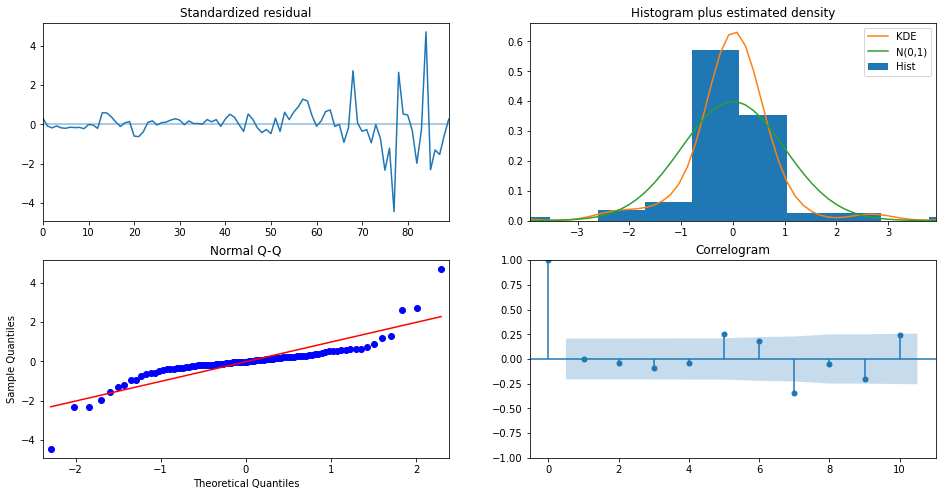

In [36]:
smodel.plot_diagnostics(figsize=(16, 8))
plt.show()

- **standardized residual**: The residual errors seem to fluctuate around a mean of zero and one, although the later third's fluctuation increases to three or four 

- **histogram**: the overall shape follows normal distribution, but heavily centralized 

- **normal Q-Q**: All the dots should fall in line with the red line. There is a greater variation in the sample Q than theoretical Q 

- **correlogram**: the residual errors are not autocorrelated, indicating there is no pattern in the residual errors which are not explained in the model

### model validation using test data

                                    ARIMA Model Results                                     
Dep. Variable:     D2.7dayrollingavg_newlyconfirmed   No. Observations:                   90
Model:                               ARIMA(0, 2, 2)   Log Likelihood                -283.300
Method:                                     css-mle   S.D. of innovations              5.567
Date:                              Thu, 28 Jan 2021   AIC                            574.601
Time:                                      17:37:19   BIC                            584.600
Sample:                                  10-09-2020   HQIC                           578.633
                                       - 01-06-2021                                         
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     

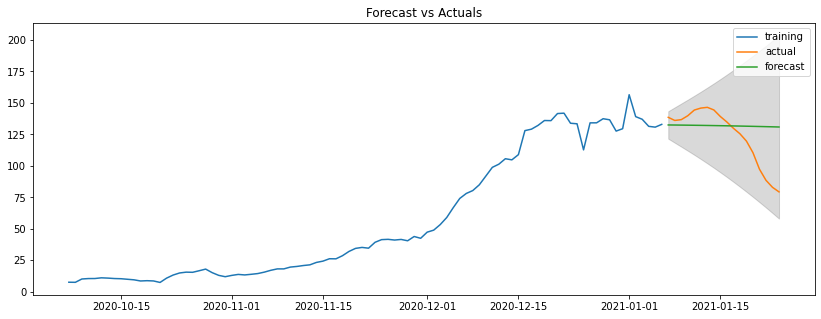

In [71]:
# the train data stops at 2021-1-6, 
# and now we use the test data that starts on 2021-1-7 to see how the model does compared to the actual data



warnings.filterwarnings("ignore") 


model = ARIMA(y_train, order=smodel.order)  
fitted = model.fit(disp=-1)  
print(fitted.summary())
#Forecast
fc, se, conf = fitted.forecast(18, alpha=0.05)  

# Make as pandas series
fc_series = pd.Series(fc, index=y_test.index)
lower_series = pd.Series(conf[:, 0], index=y_test.index)
upper_series = pd.Series(conf[:, 1], index=y_test.index)

# Plot
plt.figure(figsize=(14,5))
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend()
plt.savefig('../images/arima_la_county.png');

In [35]:


print('MSE of our forecast is:', mean_squared_error(y_test, fc_series, squared=True))
print('RMSE of our forecast is:', mean_squared_error(y_test, fc_series, squared=False))

MSE of our forecast is: 524.1627103872607
RMSE of our forecast is: 22.894600026802408


the model is not able to predict trend changes, so the difference between our forecast and the actual data widens as time goes on. However, RMSE of 22.89 is better than SARIMAX model 



### model using all data points

In [38]:
smodel = pm.auto_arima(y, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=684.987, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=761.359, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=718.901, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=686.186, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=759.361, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=686.897, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=686.522, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=684.739, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=686.600, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=687.512, Time=0.09 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=683.386, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=684.809, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=685.147, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=685.232, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=683.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 2, 2)   Log Likelihood                -338.693
Date:                Thu, 28 Jan 2021   AIC                            683.386
Time:                        14:12:10   BIC                            691.432
Sample:                             0   HQIC                           686.648
                                - 110                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0460      0.050    -21.016      0.000      -1.144      -0.948
ma.L2          0.1922      0.065      2.938      0.003       0.064       0.320
sigma2        30.5668      1.908     16.017      0.000      26.827      34.307
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               353.54
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):              40.14   Skew:                             0.76
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- the auto-ARIMA function predicts the best parameter to be (0,2,2), which will be used for the actual forecast model

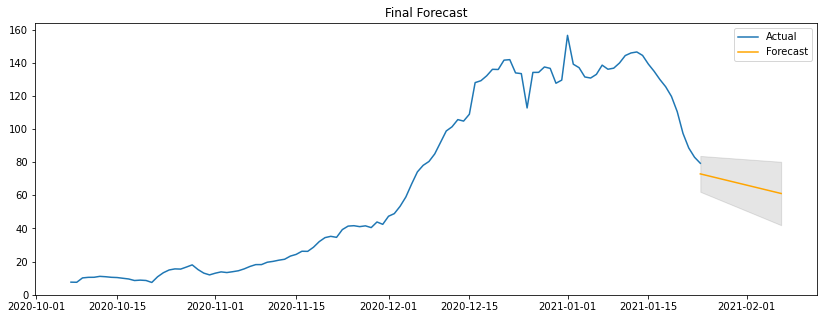

In [78]:
# Forecast
n_periods = 3
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(y.index[-1], periods=n_periods, freq='W')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot

fig = plt.figure(figsize=(14, 5))

plt.plot(y, label="Actual")
plt.plot(fitted_series, color='orange', label='Forecast')
plt.fill_between(lower_series.index,
                 lower_series,
                 upper_series,
                 color='k', alpha=.1)

plt.title('Final Forecast')
plt.legend()
plt.show()

- because of the daily fluctuation, we are using 7-day rolling average for predictions
- for ARIMA, frequency has been chosen to be WEEKS not DAYS due to this reason 

# Modeling for 7 Counties Highest New Cases/100k 
- These 7 counties have 500+ daily newly confirmed cases per 100k (7 day average) with an increasing trend
- we will model these counties for predictions 

In [72]:
hotspot_counties = ['Tehama', 'Riverside', 'Colusa', 'Merced', 'Santa Barbara', 'Inyo', 'Tulare']

features = ['hospitalized_covid_patients', '7dayrollingavg_newdeath', 'all_hospital_beds', 'icu_available_beds']


## Tehama County

Tehama = county_df.loc['Tehama'].tail(110)
Riverside = county_df.loc['Riverside'].tail(110)
Colusa = county_df.loc['Colusa'].tail(110)
Merced = county_df.loc['Merced'].tail(110)
Santa_Barbara = county_df.loc['Santa Barbara'].tail(110)
Inyo = county_df.loc['Inyo'].tail(110)
Tulare = county_df.loc['Tulare'].tail(110)

In [85]:
# build a function to incorporate everything 
warnings.filterwarnings("ignore") 
def arima_model (countydf):
    X = countydf[features]
    y = countydf[['7dayrollingavg_newlyconfirmed']]   
    X_train = X.iloc[:92]
    X_test = X.iloc[92:]
    y_train = y.iloc[:92]
    y_test = y.iloc[92:]
    
    smodel = pm.auto_arima(y_train, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=False,
                         d=None, D=None, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

    print(smodel.summary())

    model = ARIMA(y_train, order=smodel.order)  
    fitted = model.fit(disp=-1)  
    print(fitted.summary())
    # Forecast
    fc, se, conf = fitted.forecast(18, alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=y_test.index)
    lower_series = pd.Series(conf[:, 0], index=y_test.index)
    upper_series = pd.Series(conf[:, 1], index=y_test.index)

    # Plot
    plt.figure(figsize=(14,5))
    plt.plot(y_train, label='training')
    plt.plot(y_test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend()
    plt.show()



    print('MSE of our forecast is:', mean_squared_error(y_test, fc_series, squared=True))
    print('RMSE of our forecast is:', mean_squared_error(y_test, fc_series, squared=False))


    
    # use the whole dataset to make actual predictions
    
    smodel = pm.auto_arima(y, start_p=1, start_q=1,
                             test='adf',
                             max_p=3, max_q=3, m=12,
                             start_P=0, seasonal=False,
                             d=None, D=None, trace=True,
                             error_action='ignore',  
                             suppress_warnings=True, 
                             stepwise=True)

    print(smodel.summary())


    # Forecast
    n_periods = 3
    fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
    index_of_fc = pd.date_range(y.index[-1], periods=n_periods, freq='W')

    # make series for plotting purpose
    fitted_series = pd.Series(fitted, index=index_of_fc)
    lower_series = pd.Series(confint[:, 0], index=index_of_fc)
    upper_series = pd.Series(confint[:, 1], index=index_of_fc)

    # Plot

    fig = plt.figure(figsize=(14, 5))

    plt.plot(y, label="Actual")
    plt.plot(fitted_series, color='orange', label='Forecast')
    plt.fill_between(lower_series.index,
                     lower_series,
                     upper_series,
                     color='k', alpha=.1)

    plt.title('Final Forecast')
    plt.legend()
    plt.show()
    print(fitted_series)
    return 

## Tehama County

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.12 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=596.915, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=567.628, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=594.944, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=554.762, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=547.391, Time=0.05 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=543.793, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=542.016, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=545.566, Time=0.02 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(2,2

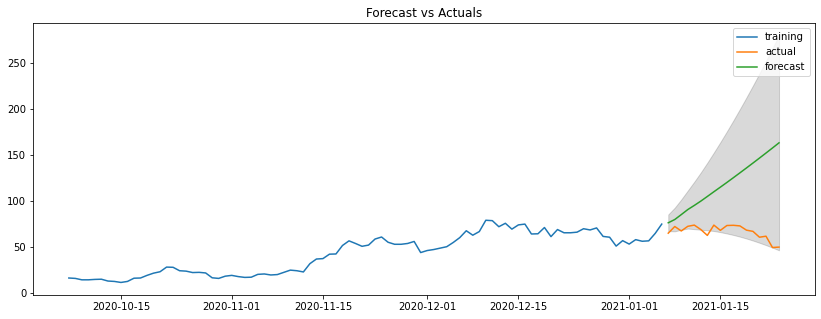

MSE of our forecast is: 3665.4503594085277
RMSE of our forecast is: 60.54296292227964
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=653.938, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=654.595, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=652.013, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=652.508, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=653.046, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=653.909, Time=0.02 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=655.115, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=650.691, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=652.523, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=652.574, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=651.216, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=653.454, Time=0.04 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.249 seconds
              

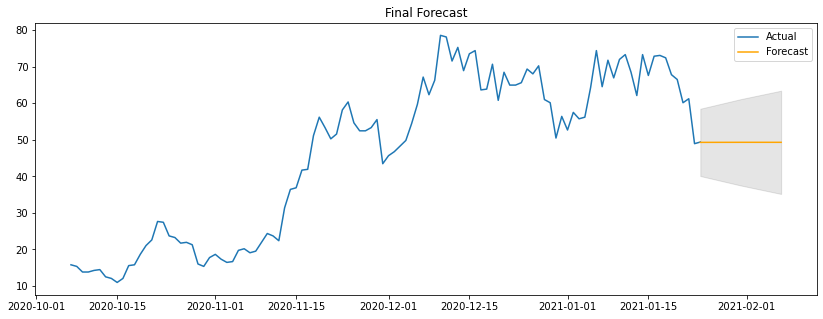

2021-01-24    49.300240
2021-01-31    49.317279
2021-02-07    49.313922
Freq: W-SUN, dtype: float64


In [86]:
arima_model(Tehama)

## Riverside County

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=563.188, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=581.413, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=561.905, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=564.721, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=584.545, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=562.932, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=564.921, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=561.854, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=563.251, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=563.352, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=566.089, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=565.251, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.248 seconds
                               SARIMAX Results                                
Dep. Variable:       

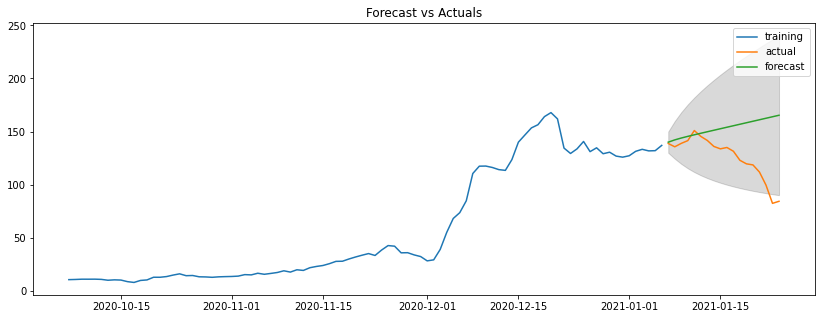

MSE of our forecast is: 1428.9248011926402
RMSE of our forecast is: 37.80112169225458
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=681.099, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=704.927, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=679.688, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=683.758, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=704.297, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=680.932, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=682.930, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=678.200, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=679.573, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=679.689, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=682.697, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=681.573, Time=0.02 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 0.237 seconds
              

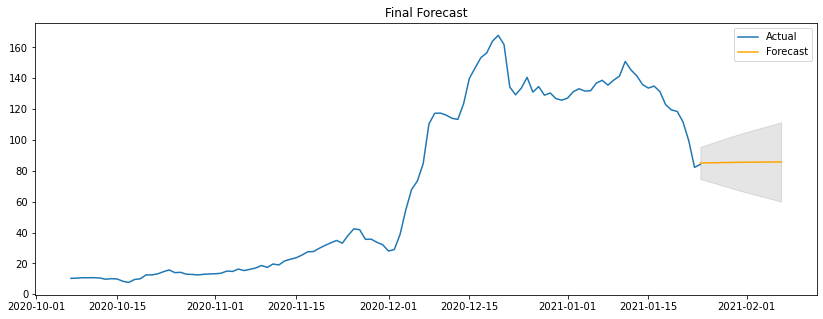

2021-01-24    85.122324
2021-01-31    85.561050
2021-02-07    85.769222
Freq: W-SUN, dtype: float64


In [87]:
## Riverside County

arima_model(Riverside)

## Colusa County

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=637.091, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=635.615, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=637.548, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=637.493, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=634.508, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.131 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -316.254
Date:                Thu, 28 Jan 2021   AIC                            634.508
Time:                        18:07:50   BIC                            637.019
Sample:                             0   HQIC                           635.521
                                 - 92                                         
Co

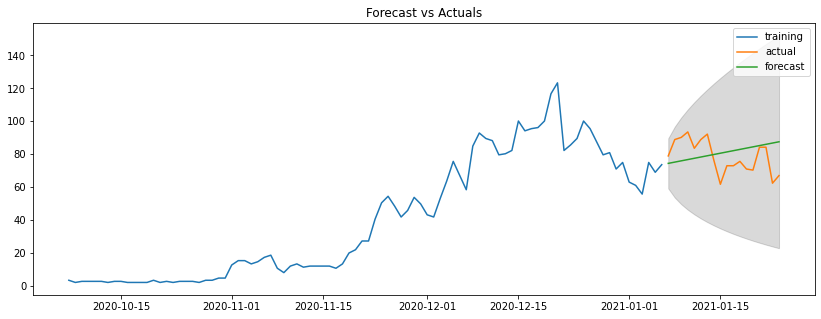

MSE of our forecast is: 165.25195474667112
RMSE of our forecast is: 12.855036162791263
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=769.384, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=768.846, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=770.750, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=770.645, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=767.414, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.112 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -382.707
Date:                Thu, 28 Jan 2021   AIC                            767.414
Time:                        18:07:50   BIC                            770.105
Sample:                             0   HQIC                           76

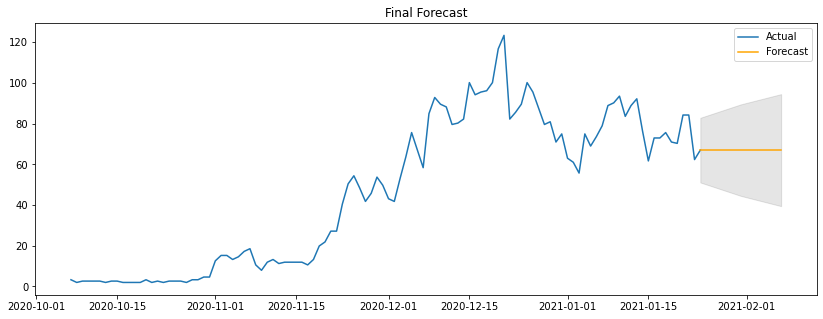

2021-01-24    66.96325
2021-01-31    66.96325
2021-02-07    66.96325
Freq: W-SUN, dtype: float64


In [88]:
## Colusa County

arima_model(Colusa)

## Merced County

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.23 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=558.921, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=530.665, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=556.940, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=531.169, Time=0.03 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=528.698, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=529.206, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=515.151, Time=0.02 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=510.706, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(0,2

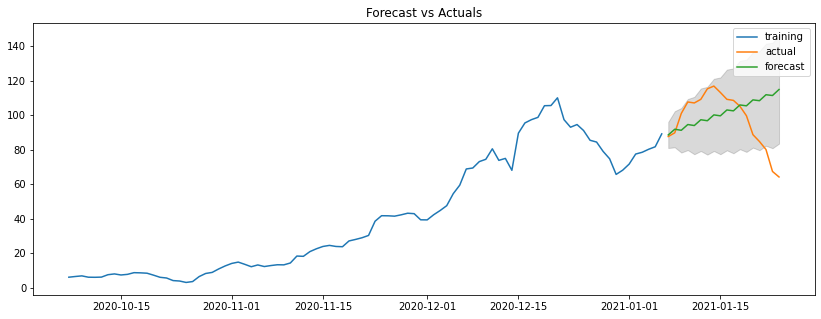

MSE of our forecast is: 442.36892619948713
RMSE of our forecast is: 21.03256822643129
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=629.203, Time=0.03 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=672.651, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=644.454, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=627.248, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=670.655, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=629.204, Time=0.03 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=623.932, Time=0.05 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=622.200, Time=0.06 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=631.199, Time=0.04 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=616.204, Time=0.11 sec
 ARIMA(3,2,3)(0,0,0)[0] intercept   : AIC=621.181, Time=0.11 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=620.843, Time=0.07 sec
 ARIMA(2,2,3)(0,0,0)[0]       

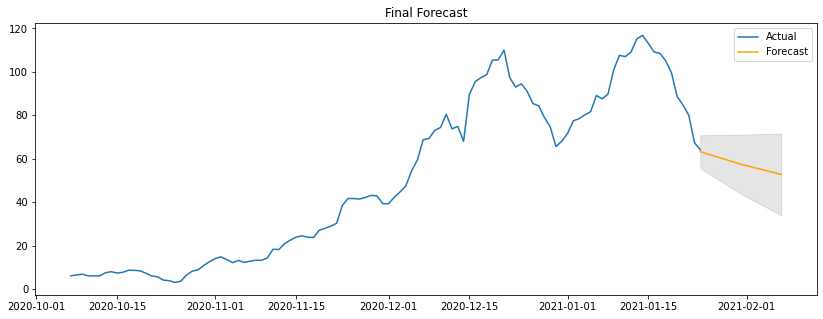

2021-01-24    63.227179
2021-01-31    57.500112
2021-02-07    52.784661
Freq: W-SUN, dtype: float64


In [89]:
## Merced County## Merced County

arima_model(Merced)

## Santa Barbara County

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.13 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=468.053, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=415.870, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=466.084, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=397.520, Time=0.02 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=391.290, Time=0.03 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=387.236, Time=0.04 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=385.448, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=387.307, Time=0.07 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=385.307, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=383.646, Time=0.03 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=385.289, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=382.768, Time=0.0

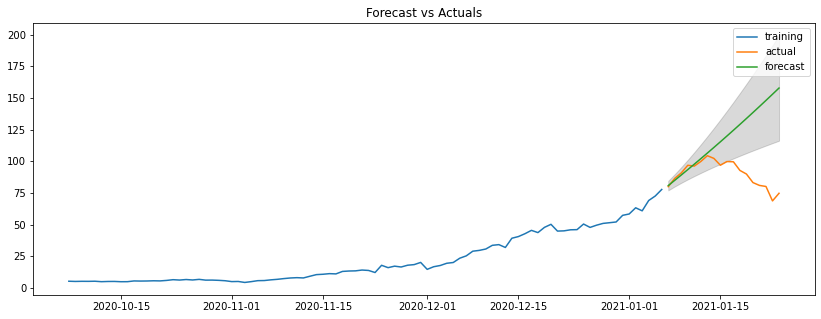

MSE of our forecast is: 1681.254168784089
RMSE of our forecast is: 41.00309950216067
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=522.577, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=605.575, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=552.531, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=534.631, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=603.598, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=519.406, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=527.126, Time=0.02 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=519.648, Time=0.04 sec
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=515.341, Time=0.06 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=514.728, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=512.848, Time=0.02 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=514.677, Time=0.04 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=515.725, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[0]    

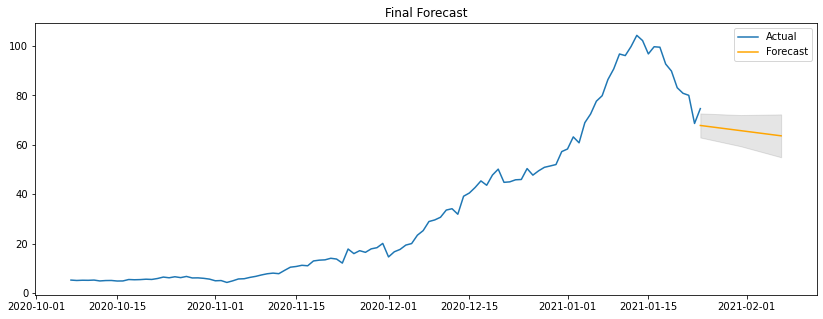

2021-01-24    67.848888
2021-01-31    65.751343
2021-02-07    63.653798
Freq: W-SUN, dtype: float64


In [90]:
## Santa Barbara County## Santa Barbara County

arima_model(Santa_Barbara)

## Inyo County

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=602.481, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=601.693, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=602.401, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=601.458, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=600.089, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.125 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   92
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -299.044
Date:                Thu, 28 Jan 2021   AIC                            600.089
Time:                        18:08:12   BIC                            602.600
Sample:                             0   HQIC                           601.102
                                 - 92                                         
Co

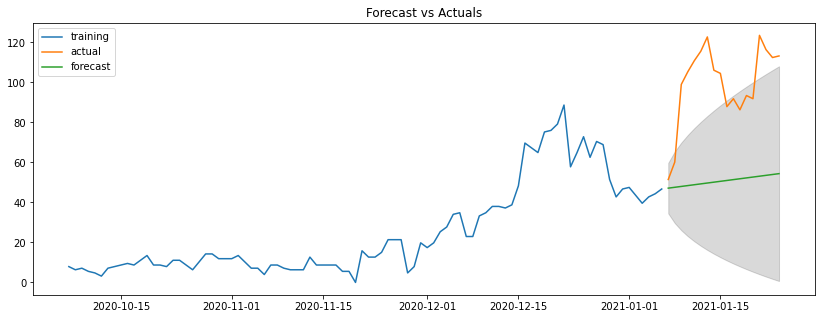

MSE of our forecast is: 2714.2434887620243
RMSE of our forecast is: 52.09840197896692
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=773.685, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=769.830, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=771.685, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=771.685, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=769.363, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.099 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  110
Model:               SARIMAX(0, 1, 0)   Log Likelihood                -383.682
Date:                Thu, 28 Jan 2021   AIC                            769.363
Time:                        18:08:12   BIC                            772.055
Sample:                             0   HQIC                           770

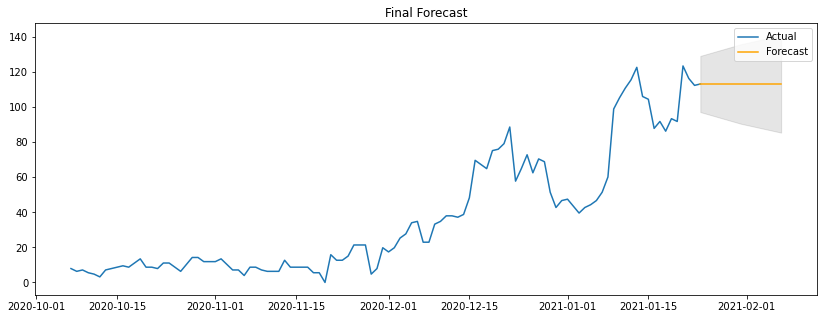

2021-01-24    113.246696
2021-01-31    113.246696
2021-02-07    113.246696
Freq: W-SUN, dtype: float64


In [91]:
## Inyo County## Tulare County## Inyo County

arima_model(Inyo)

## Tulare County

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=556.066, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=551.819, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=523.460, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=554.066, Time=0.01 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=521.514, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=549.819, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=inf, Time=0.07 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.530 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. O

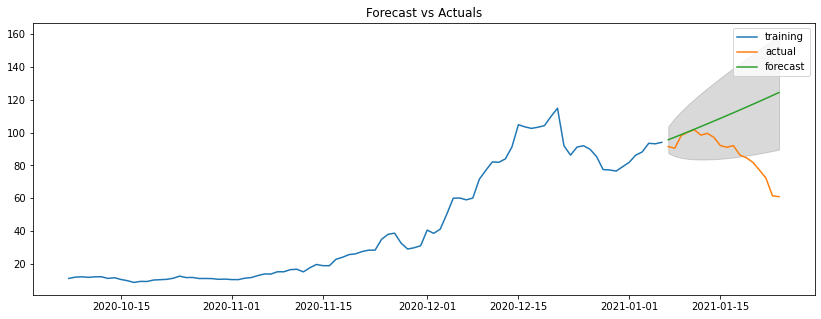

MSE of our forecast is: 894.2127464877462
RMSE of our forecast is: 29.90339021729386
Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=622.065, Time=0.04 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=663.692, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=656.375, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=623.564, Time=0.02 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=661.693, Time=0.01 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=621.872, Time=0.05 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=620.253, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=621.252, Time=0.05 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=621.584, Time=0.08 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=618.544, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=621.842, Time=0.01 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=620.161, Time=0.04 sec
 ARIMA(0,2,3)(0,0,0)[0]        

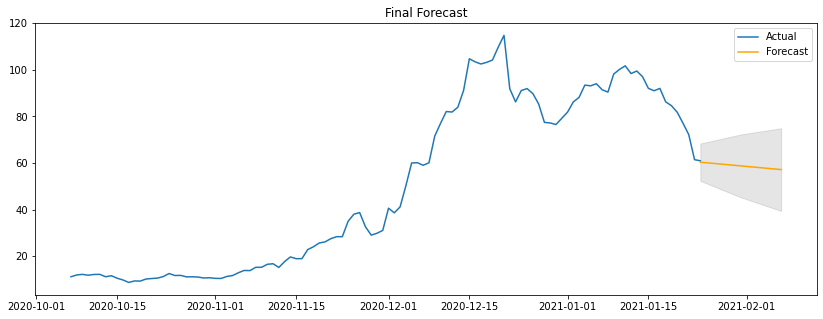

2021-01-24    60.375035
2021-01-31    58.793374
2021-02-07    57.211712
Freq: W-SUN, dtype: float64


In [92]:
## Tulare County

arima_model(Tulare)